<p style="font-family:'Brush Script MT', cursive; line-height: 2; font-size: 42px; text-align: center; color: #06d6a0">Interactive Dashboard using Bokeh and Pandas</p>

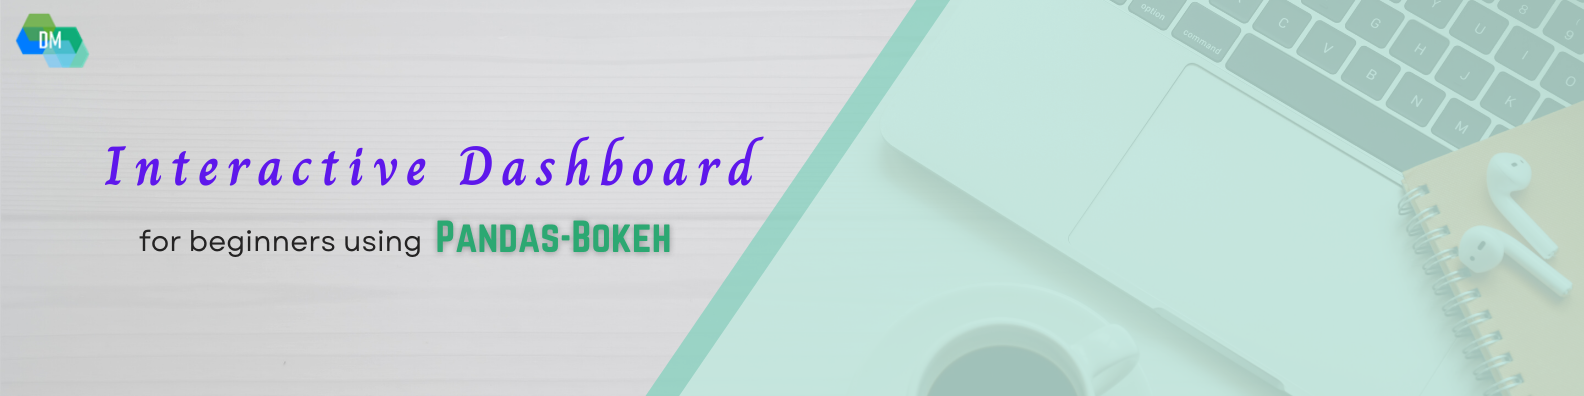

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">Bokeh is an Open-Source library for interactive visualization that renders graphics using HTML and JavaScript. It is a powerful EDA tool that can also be used to build web-based dashboards and applications. Bokeh supports line graphs, pie charts, Bar charts & Stacked Bar charts, histograms, and scatter plots. The data source is converted to a JSON file which becomes an input to BokehJS (JavaScript library) and this makes it possible to render browser-supported interactive plots & visualization.</p>

<h3 style="font-family: Trebuchet MS;background-color:#edf2f4;color:#06d6a0;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Installing Library & Importing Packages 📚 </centre></strong></h3>

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">Let’s start by installing the library 'pandas-bokeh' first using pip from PyPI.</p>

In [1]:
#Install pandas-bokeh. 
#https://pypi.org/project/pandas-bokeh/

!pip install pandas-bokeh

In [2]:
import pandas as pd
import numpy as np
import pandas_bokeh

In [3]:
pandas_bokeh.output_notebook() 

Loading BokehJS ...

<h3 style="font-family: Trebuchet MS;background-color:#edf2f4;color:#06d6a0;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Generating Dataset ✏️</centre></strong></h3>

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">For this beginner-friendly tutorial, we are generating a simple random dataset using the NumPy library and using it to build the dashboard.<p>

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">Let us assume that the dataset contains samples of measured values from 4 sensors over a period of 12 months and each value has a unique identification number & a category associated with it. This means there are a total of 6 features i.e., ‘id’, ‘month’, ‘sensor_1’, ‘sensor_2’, ‘sensor_3’, and ‘category’. For simplicity, we are considering only 15 samples or rows of data.</p>

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">To generate this dataset, we use the np.random function from the NumPy library as follows. (Official documentation link for NumPy: https://numpy.org/doc/stable/reference/random/generator.html)</p>

In [4]:
#define category
category = ['A', 'B','C']
#set random seed to make the dataset reproducible
np.random.seed(42)

#create a dataset
df_random = pd.DataFrame({
   'id': np.arange(0, 15),
   'month':np.random.randint(1, 12, 15),
   'sensor_1': np.random.uniform(0, 1,15),
   'sensor_2': np.random.uniform(10, 15, 15),
   'sensor_3': np.random.randint(0, 20, 15),
   'category': np.random.choice(category, 15, p=[0.2, 0.4, 0.4])
})
df_random=df_random.set_index('id')
df_random.shape

(15, 5)

In [5]:
df_random

,month,sensor_1,sensor_2,sensor_3,category
id,,,,,
0,7,0.708073,12.280350,14,B
1,4,0.020584,13.925880,6,A
2,11,0.969910,10.998369,11,C
3,8,0.832443,12.571172,7,B
4,5,0.212339,12.962073,14,B
5,7,0.181825,10.232252,2,C
6,10,0.183405,13.037724,13,C
7,3,0.304242,10.852621,16,B
8,7,0.524756,10.325258,3,B


In [6]:
df_random.dtypes

month         int64
sensor_1    float64
sensor_2    float64
sensor_3      int64
category     object
dtype: object

In [7]:
print(df_random.nunique())

month        7
sensor_1    15
sensor_2    15
sensor_3    12
category     3
dtype: int64


<h3 style="font-family: Trebuchet MS;background-color:#edf2f4;color:#06d6a0;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Plotting charts 📊</centre></strong></h3>

<p style="font-family: Arials; font-size: 19px;text-align: center;; font-style: normal;line-height:1.3">Now we can plot the chart in a dashboard. For demonstration purposes, let us plot the following charts using the pandas_bokeh library- Line plot, Bar chart, Stacked Bar chart, Scatter plot, Pie chart, Histogram</p>

In [8]:
#color palette
colors=['#FDE724','#D01C8B','#4DAC26']


#For demonstration purpose, let us plot -Line plot,Bar chart,Stacked Bar chart,Scatter plot,Pie chart,Histogram

# Plot1 - Line plot
p_line = df_random.groupby(['month']).mean().plot_bokeh(kind="line",y="sensor_2",color='#d01c8b',plot_data_points=True,show_figure=False)

# Plot2- Barplot
p_bar = df_random.groupby(['month']).mean().plot_bokeh(kind="bar",colormap=colors,show_figure=False)

# Plot3- stacked bar chart
df_sensor=df_random.drop(['month'],axis=1)
p_stack=df_sensor.groupby(['category']).mean().plot_bokeh(kind='barh', stacked=True,colormap=colors,show_figure=False)

#Plot4- Scatterplot
p_scatter = df_random.plot_bokeh(kind="scatter", x="month", y="sensor_2",category="category",colormap=colors,show_figure=False)

#Plot5- Pie chart
p_pie= df_random.groupby(['category']).mean().plot_bokeh.pie(y='sensor_1',colormap=colors,show_figure=False) 

#Plot6- Histogram
p_hist=df_sensor.plot_bokeh(kind='hist', histogram_type="stacked",bins=10,colormap=colors, show_figure=False) 

__x__values_original


<h3 style="font-family: Trebuchet MS;background-color:#edf2f4;color:#06d6a0;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Make Dashboard 🎨</centre></strong></h3>

In [9]:
#Make Dashboard with Grid Layout: 
pandas_bokeh.plot_grid([[p_line, p_bar,p_stack],[p_scatter, p_pie,p_hist]], plot_width=400)

Column(id='1691', ...)

📌  Details of the Dashboard and model setup are discussed in my article https://www.analyticsvidhya.com/blog/2021/09/building-an-interactive-dashboard-using-bokeh-and-pandas/ published on AnalyticsVidhya.

<h3 style="font-family: Trebuchet MS;background-color:#edf2f4;color:#06d6a0;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>